In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
water_tank_logs = "../../logs/ppo/double_water_tank/progress.csv"
cpap_logs = "../../logs/ppo/CPAP/progress.csv"

In [ ]:
df = pd.read_csv(water_tank_logs)
df

,train/loss,train/learning_rate,train/clip_fraction,train/std,train/entropy_loss,train/value_loss,train/clip_range,train/policy_gradient_loss,train/iteration,train/explained_variance,train/approx_kl,train/n_updates
0,0.014148,0.0003,1.0,1.0,-1.418939,7.588073e-01,0.2,0.0,1,NaN,2.118022e+13,10
1,0.013988,0.0003,1.0,1.0,-1.418939,7.010163e-01,0.2,0.0,2,NaN,2.366715e+13,20
2,0.013691,0.0003,1.0,1.0,-1.418939,6.840095e-01,0.2,0.0,3,NaN,1.798447e+13,30
3,0.013290,0.0003,1.0,1.0,-1.418939,3.183799e+05,0.2,0.0,4,NaN,2.487598e+13,40
4,0.012989,0.0003,1.0,1.0,-1.418939,6.545321e-01,0.2,0.0,5,NaN,3.946298e+13,50
5,0.012853,0.0003,1.0,1.0,-1.418939,6.395093e-01,0.2,0.0,6,NaN,4.997952e+13,60
6,0.011852,0.0003,1.0,1.0,-1.418939,6.222237e-01,0.2,0.0,7,NaN,4.108018e+13,70
7,0.012297,0.0003,1.0,1.0,-1.418939,6.056721e-01,0.2,0.0,8,NaN,5.934960e+13,80
8,0.011835,0.0003,1.0,1.0,-1.418939,3.652295e+06,0.2,0.0,9,NaN,6.109151e+13,90
9,0.011564,0.0003,1.0,1.0,-1.418939,5.810028e-01,0.2,0.0,10,NaN,4.934671e+13,100


In [6]:
df.columns

Index(['train/loss', 'train/learning_rate', 'train/clip_fraction', 'train/std',
       'train/entropy_loss', 'train/value_loss', 'train/clip_range',
       'train/policy_gradient_loss', 'train/iteration',
       'train/explained_variance', 'train/approx_kl', 'train/n_updates'],
      dtype='object')

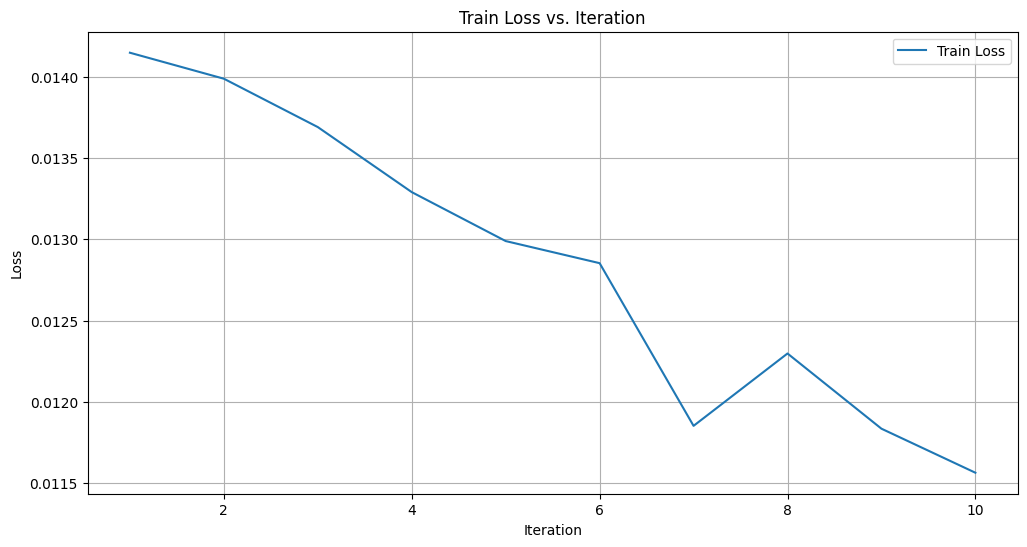

In [7]:
# Plotting train/loss vs train/iteration
plt.figure(figsize=(12, 6))
plt.plot(df['train/iteration'], df['train/loss'], label='Train Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Train Loss vs. Iteration')
plt.legend()
plt.grid(True)
plt.show()